## Exercise 1

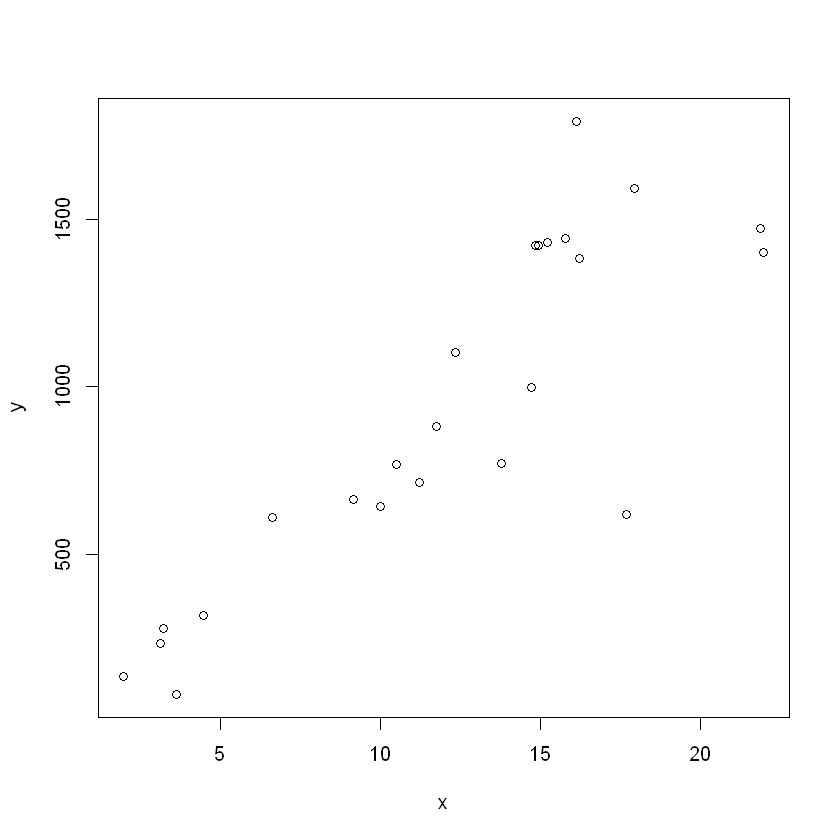

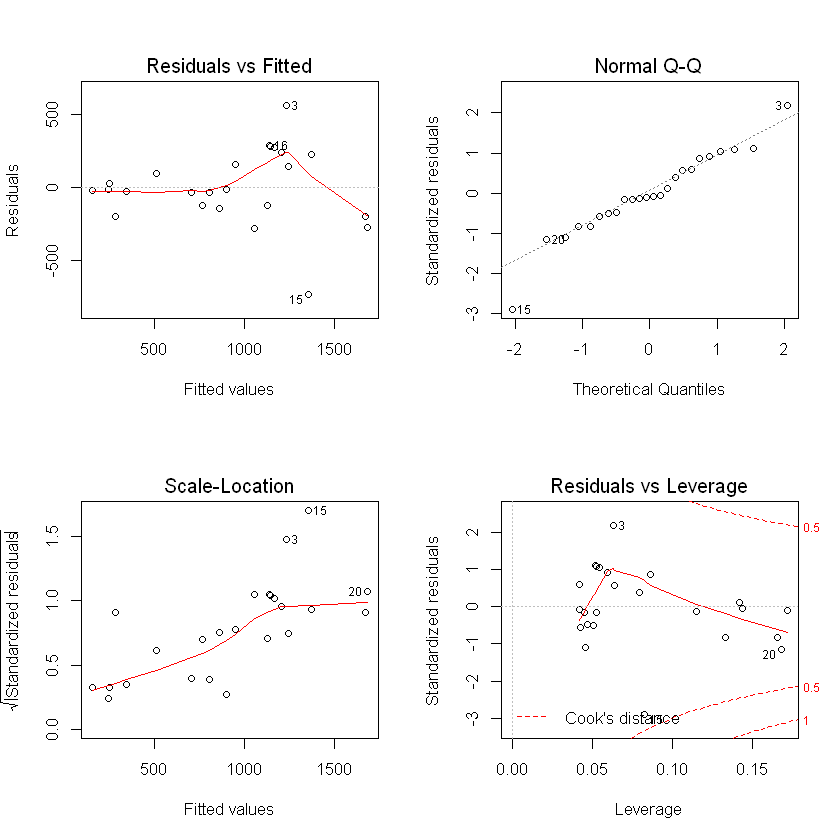

In [64]:
# part a
require(gamair)
require(mgcv)
data(hubble)
#head(hubble)
mod <- gam(y ~ s(x), data=hubble)
mod2 <- lm(y~x, data=hubble)
with(hubble, plot(x, y))
#plot(mod)
par(mfrow=c(2, 2))
plot(mod2)
#mod;mod2
#AIC(mod, mod2)

The smooth model has a lower GCV and lower AIC score than the straight line model. On the face of it there is a suggestion that velocities are lower at very high distances than Hubble's law suggests. This would imply an eccelerating expansion.


Method: GCV   Optimizer: magic
Smoothing parameter selection converged after 5 iterations.
The RMS GCV score gradient at convergence was 1.456957 .
The Hessian was positive definite.
Model rank =  10 / 10 

Basis dimension (k) checking results. Low p-value (k-index<1) may
indicate that k is too low, especially if edf is close to k'.

       k'  edf k-index p-value
s(x) 9.00 2.13       1    0.35


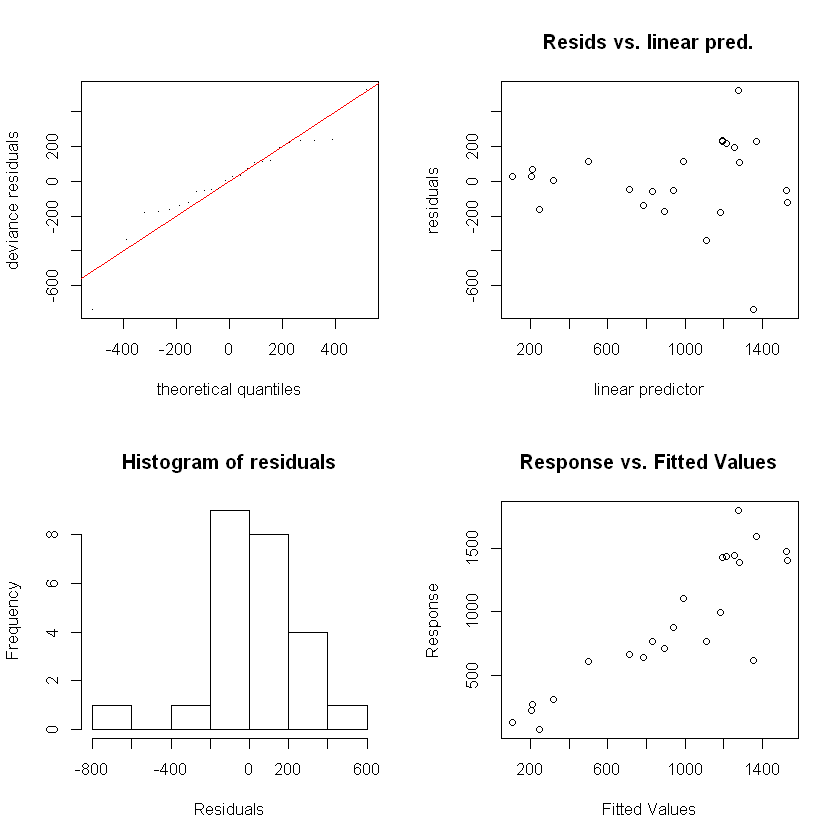

In [20]:
# part b
gam.check(mod)


Method: GCV   Optimizer: outer newton
full convergence after 9 iterations.
Gradient range [-3.456696e-05,-3.456696e-05]
(score 72.3071 & scale 60.87159).
Hessian positive definite, eigenvalue range [3.456634e-05,3.456634e-05].
Model rank =  10 / 10 

Basis dimension (k) checking results. Low p-value (k-index<1) may
indicate that k is too low, especially if edf is close to k'.

     k' edf k-index p-value
s(x)  9   1    0.99     0.4


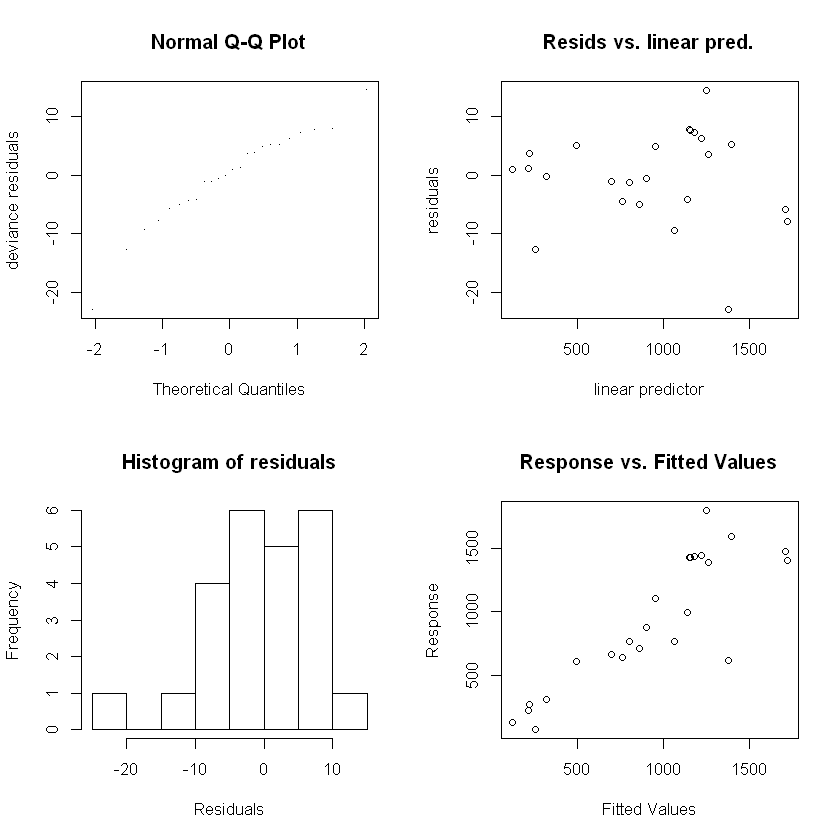

In [22]:
mod3 <- gam(y~s(x), data=hubble, family=quasi(var=mu))
gam.check(mod3)

The residual plots for `mod2` are problematic because there is a clear relationship between the mean and the variance. `mod3` usees a quasi-likelihood approach, and the residual plots look better

## Exercise 2

In [27]:
# part a
require(MASS)

Loading required package: MASS


In [28]:
data(mcycle)
head(mcycle)

times,accel
2.4,0.0
2.6,-1.3
3.2,-2.7
3.6,0.0
4.0,-2.7
6.2,-2.7


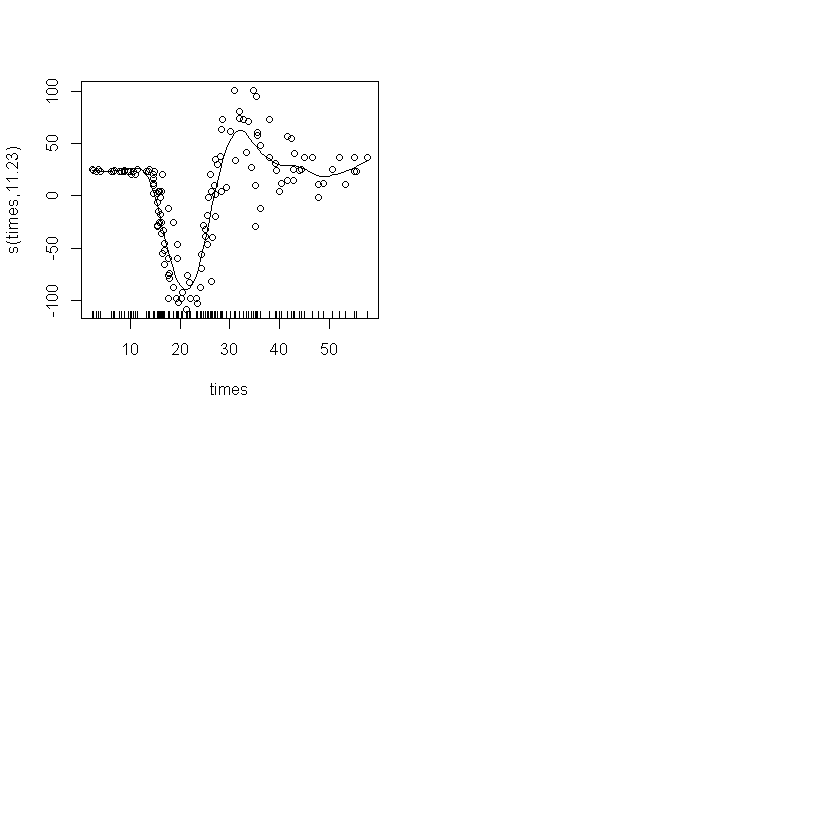

In [34]:
m1 <- gam(accel ~ s(times, k=40), data=mcycle) # why don't you need to specify a family?
par(mfrow=c(2, 2))
plot(m1, residuals=TRUE, se=FALSE, pch=1)

Fitted curve dips too early

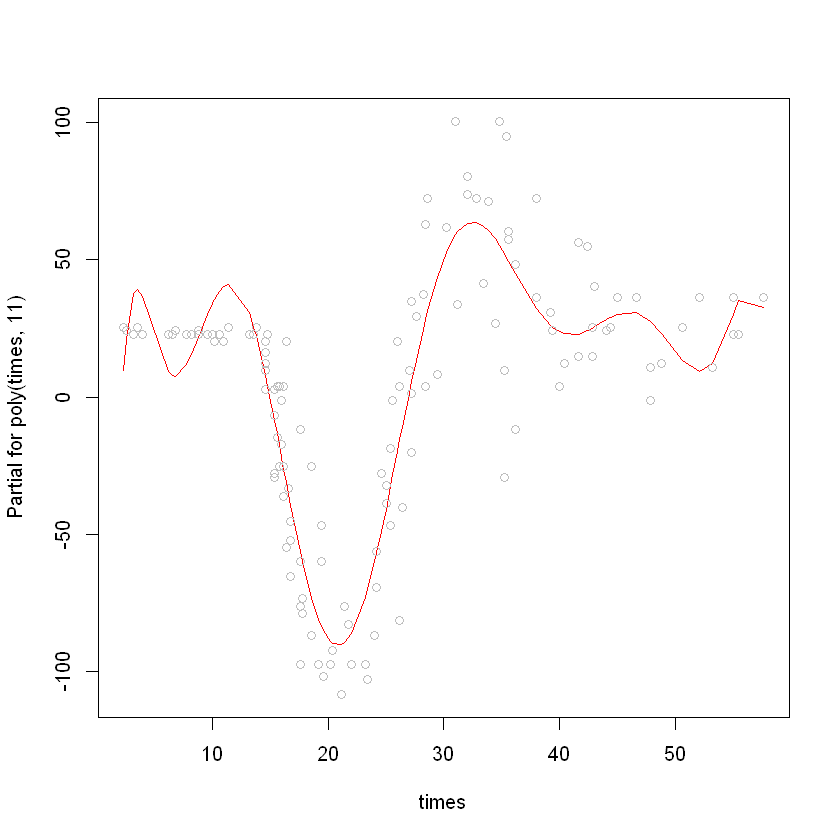

In [35]:
# part b
m2 <- lm(accel~poly(times,11),data=mcycle)
termplot(m2,partial.resid=TRUE)

Wild oscillation

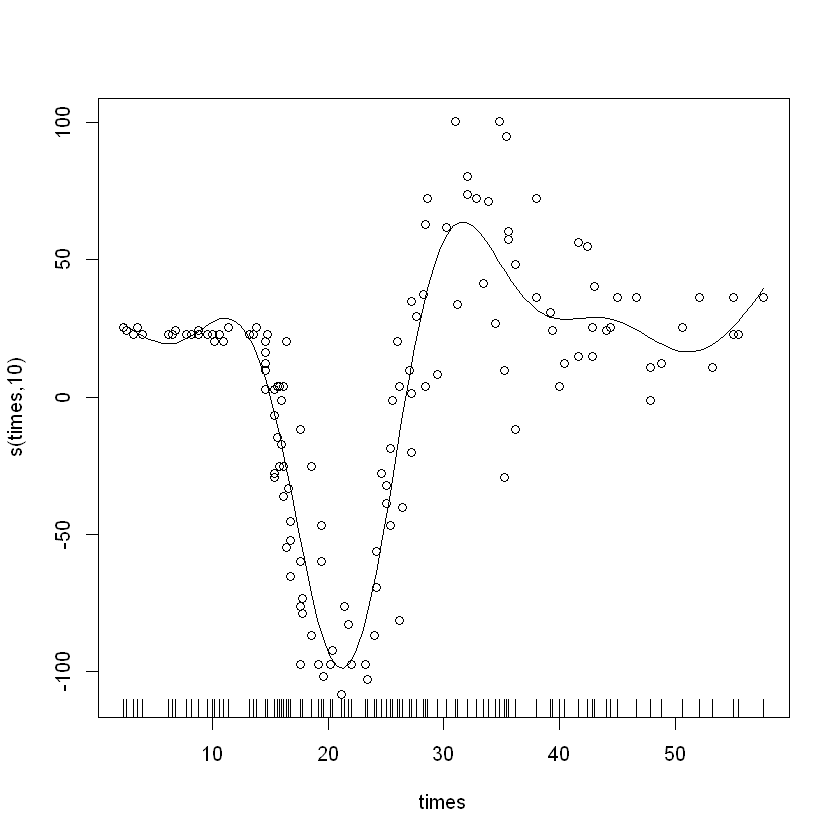

In [36]:
# part c
m3 <- gam(accel~s(times,k=11,fx=TRUE), data=mcycle)
plot(m3, residuals=TRUE, se=FALSE, pch=1)

Pretty similar to `m1`

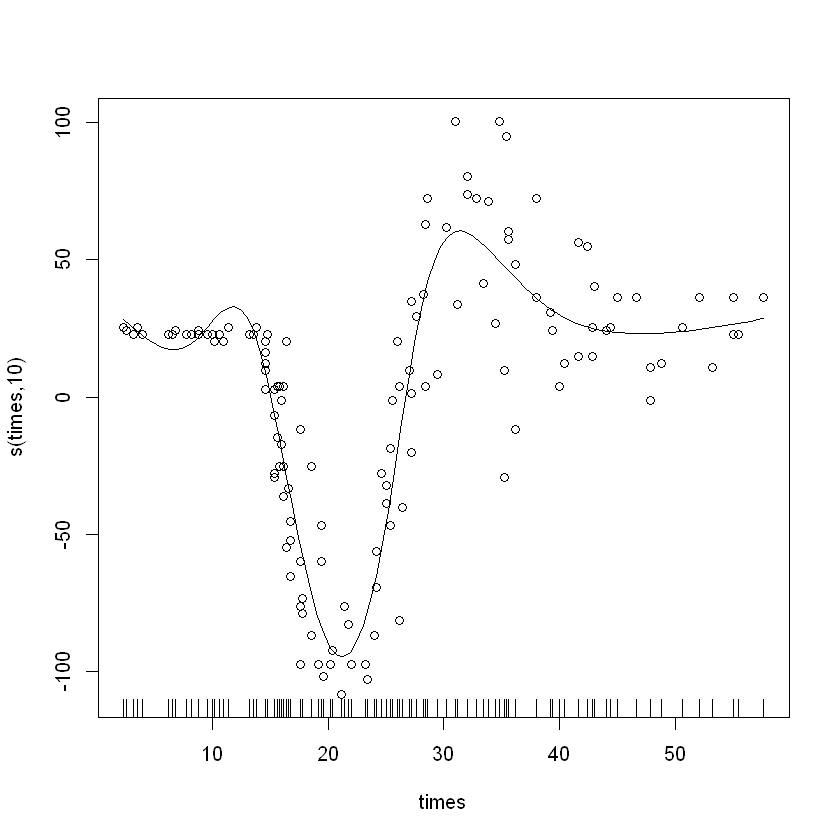

In [38]:
# part d
m4 <- gam(accel~s(times, k=11, fx=TRUE, bs="cr"), data=mcycle)
plot(m4, residuals=TRUE, se=FALSE, pch=1)

Order of acceptability of the results for the four models is (from best to worst):
mc1, mc3, mc4, mc2

i.e., the polynomial does much worse than any sort of spline, while regression splines are a bit worse than penalized splines; however, the thin-plate regression splint (TPRS) is almost as good as a penalized spline.

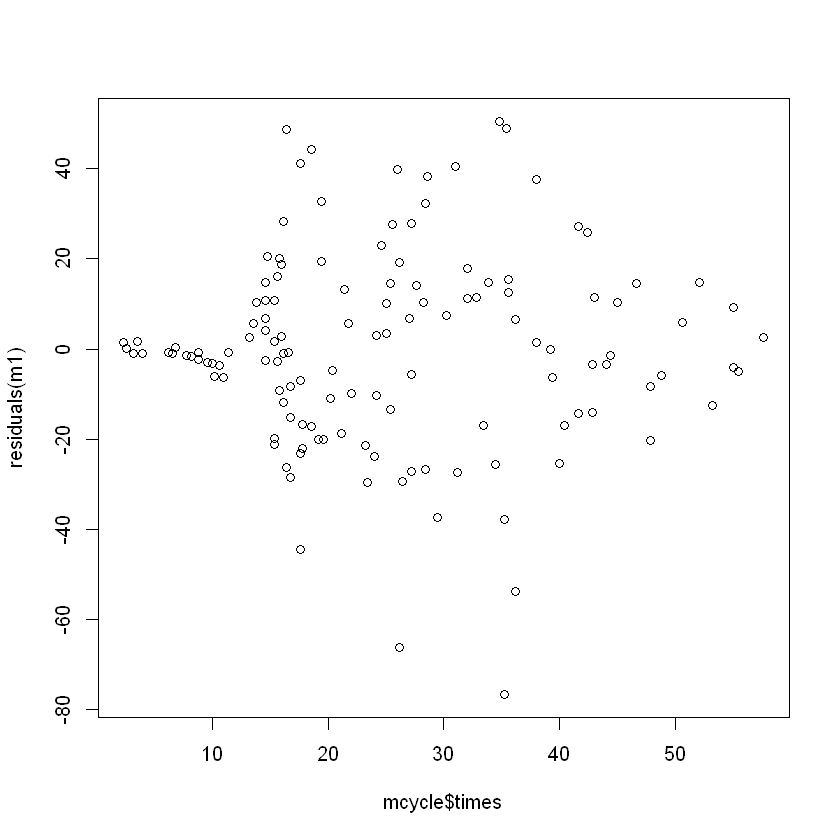

In [40]:
# part e
par(mfrow=c(1, 1))
plot(mcycle$times, residuals(m1))

The first few observations have much lower variance than the rest. Also, there seems to be reduced variance in the last few observations as well. There are also a couple of clear clusters. This suggests that perhaps the model does not capture the mean acceleration correctly in this region. This is also apparent in plotting `m1`, where the model dips too early.

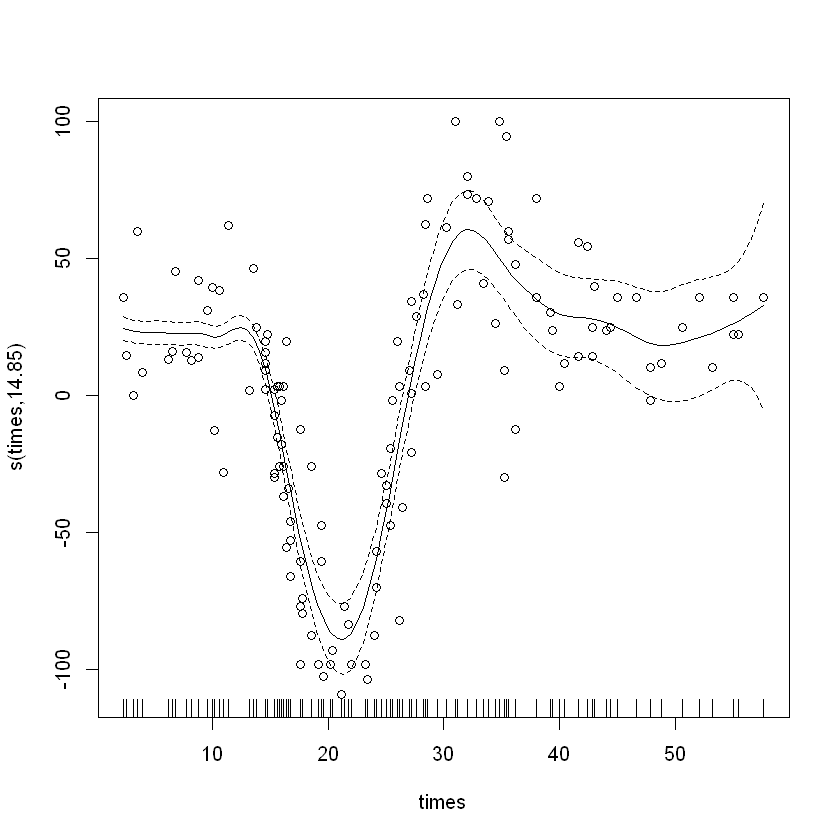

[1] 0.9990816

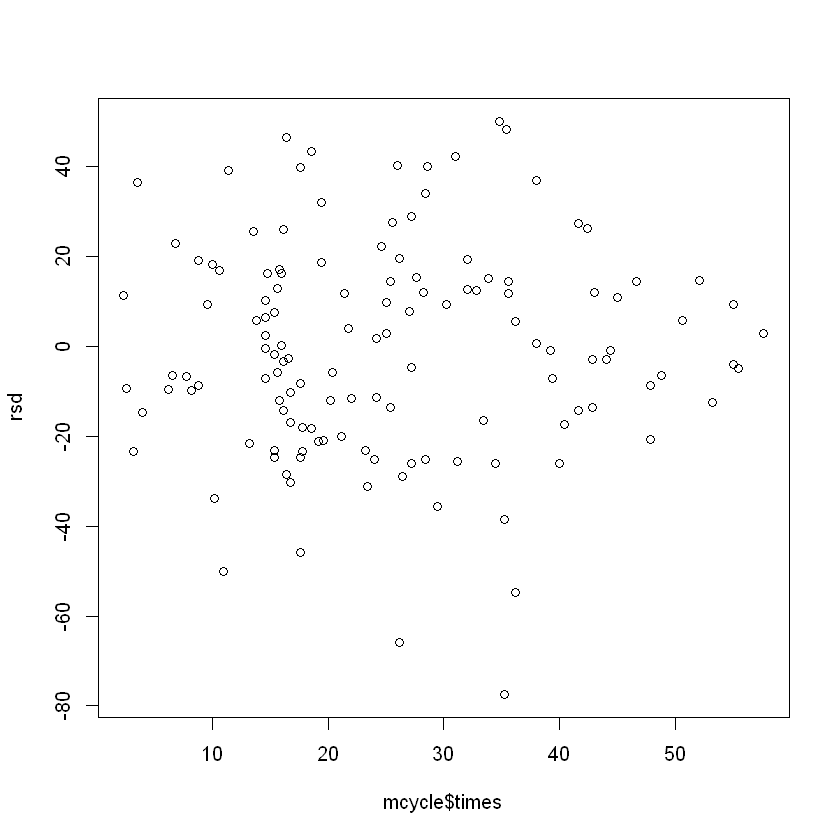

In [44]:
# part f
mcw <- gam(accel~s(times, k=40), data=mcycle,weights=c(rep (400, 20), rep (1, 113)))
plot(mcw, residuals=TRUE, pch=1)
rsd <- residuals(mcw)
plot(mcycle$times, rsd)
var(rsd[21:133])/var(rsd[1:20])

In [47]:
# part g
# The following uses the integrated squared third derivative as penalty (m=3)
final <- gam(accel~s(times,k=40,m=3), data=mcycle, weights=c(rep(400, 20), rep(1, 113)))


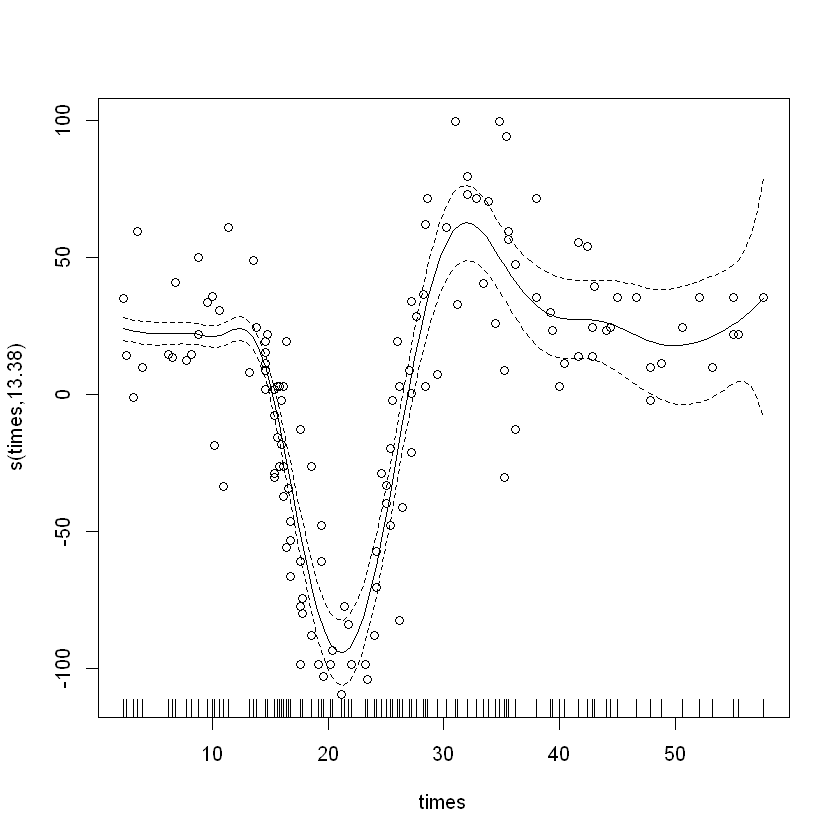

In [48]:
plot(final, residuals=TRUE, pch=1)